In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('Assam_rainfall_with_flood_columns.xlsx')

# Define the threshold for 'high rainfall' based on average normal rainfall
high_rainfall_threshold = data['NORMAL (mm)'].mean()

# Calculate 3-day cumulative rainfall
data['3_Day_Cumulative_Actual_Rainfall'] = data['ACTUAL (mm)'].rolling(window=3, min_periods=1).sum()

# Calculate consecutive high rainfall days
data['High_Rainfall_Day'] = (data['ACTUAL (mm)'] > high_rainfall_threshold).astype(int)
data['Consecutive_High_Rainfall_Days'] = data['High_Rainfall_Day'] * \
    (data['High_Rainfall_Day'].groupby((data['High_Rainfall_Day'] != data['High_Rainfall_Day'].shift()).cumsum()).cumcount() + 1)

# Fill any NaN values with 0 for simplicity
data.fillna(0, inplace=True)


In [7]:
# Define features and target variable
features = ['3_Day_Cumulative_Actual_Rainfall', 'Consecutive_High_Rainfall_Days', 'ACTUAL (mm)']
X = data[features]
y = data['flood 1']  # Or 'flood 2' depending on your use case

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1189
           1       0.45      0.10      0.17       345

    accuracy                           0.77      1534
   macro avg       0.62      0.53      0.52      1534
weighted avg       0.71      0.77      0.71      1534

[[1147   42]
 [ 310   35]]


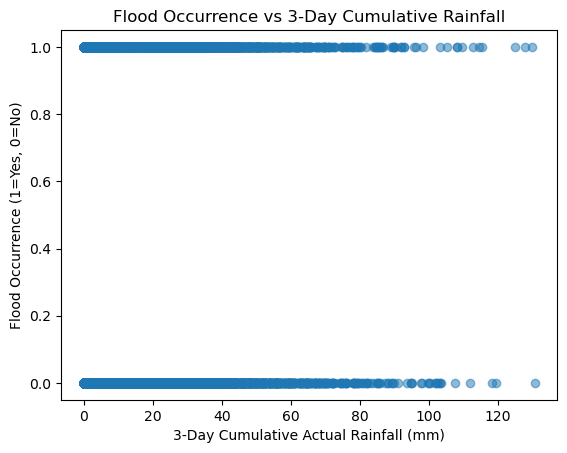

In [8]:
# Evaluate model performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the relationship between cumulative rainfall and flood occurrences
plt.scatter(data['3_Day_Cumulative_Actual_Rainfall'], data['flood 1'], alpha=0.5)
plt.xlabel('3-Day Cumulative Actual Rainfall (mm)')
plt.ylabel('Flood Occurrence (1=Yes, 0=No)')
plt.title('Flood Occurrence vs 3-Day Cumulative Rainfall')
plt.show()


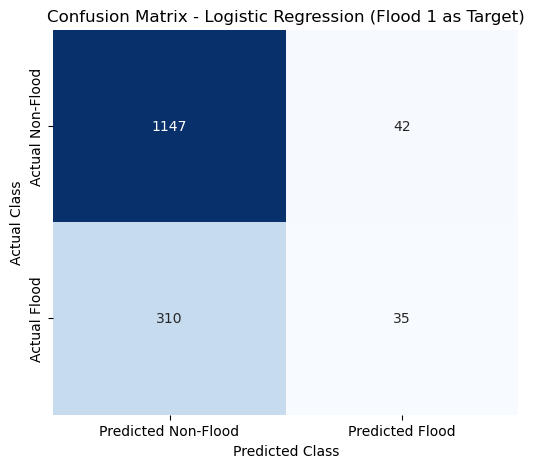

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrix data for Logistic Regression based on provided results
confusion_log_reg = np.array([[1147, 42], [310, 35]])

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_log_reg, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Non-Flood", "Predicted Flood"], 
            yticklabels=["Actual Non-Flood", "Actual Flood"])
plt.title("Confusion Matrix - Logistic Regression (Flood 1 as Target)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1188
           1       0.77      0.88      0.83      1128

    accuracy                           0.82      2316
   macro avg       0.82      0.82      0.82      2316
weighted avg       0.82      0.82      0.82      2316

[[895 293]
 [130 998]]

Gradient Boosting Classifier Results:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64      1188
           1       0.63      0.73      0.68      1128

    accuracy                           0.66      2316
   macro avg       0.66      0.66      0.66      2316
weighted avg       0.66      0.66      0.66      2316

[[702 486]
 [303 825]]


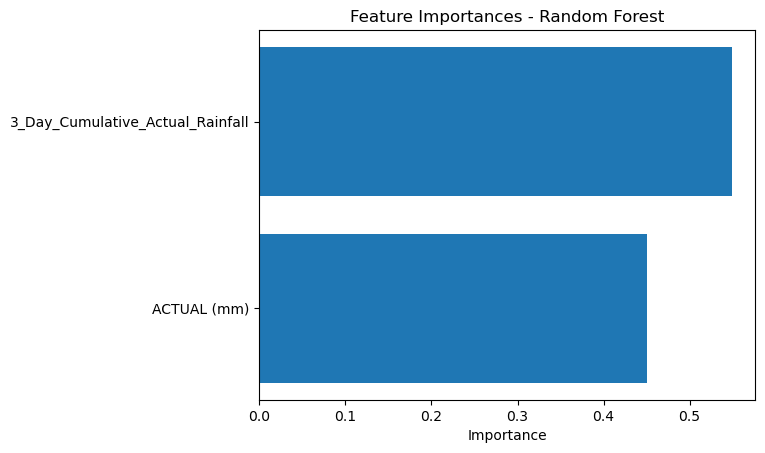

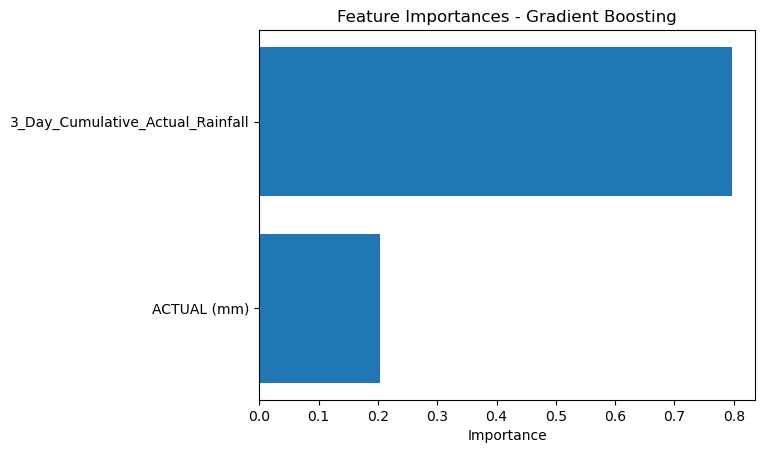

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_excel('Assam_rainfall_with_flood_columns.xlsx')

# Calculate 3-day cumulative rainfall
data['3_Day_Cumulative_Actual_Rainfall'] = data['ACTUAL (mm)'].rolling(window=3, min_periods=1).sum()

# Drop rows with NaN values in the relevant columns
data = data.dropna(subset=['3_Day_Cumulative_Actual_Rainfall', 'ACTUAL (mm)'])

# Separate majority and minority classes
no_flood = data[data['flood 1'] == 0]
flood = data[data['flood 1'] == 1]

# Oversample minority class (Flood) to match the size of the No Flood class
flood_oversampled = resample(flood, replace=True, n_samples=len(no_flood), random_state=42)

# Combine the oversampled flood data with the no flood data
data_balanced = pd.concat([no_flood, flood_oversampled])

# Split data into features and target
X = data_balanced[['ACTUAL (mm)', '3_Day_Cumulative_Actual_Rainfall']]
y = data_balanced['flood 1']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train and evaluate Random Forest
print("Random Forest Classifier Results:")
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Train and evaluate Gradient Boosting
print("\nGradient Boosting Classifier Results:")
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

# Plotting Feature Importance for Random Forest
feature_importances_rf = rf_model.feature_importances_
plt.barh(['ACTUAL (mm)', '3_Day_Cumulative_Actual_Rainfall'], feature_importances_rf)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.show()

# Plotting Feature Importance for Gradient Boosting
feature_importances_gb = gb_model.feature_importances_
plt.barh(['ACTUAL (mm)', '3_Day_Cumulative_Actual_Rainfall'], feature_importances_gb)
plt.title("Feature Importances - Gradient Boosting")
plt.xlabel("Importance")
plt.show()


Random Forest Classifier Results with Balanced Weights:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1189
           1       0.33      0.23      0.27       345

    accuracy                           0.72      1534
   macro avg       0.56      0.55      0.55      1534
weighted avg       0.69      0.72      0.70      1534

[[1030  159]
 [ 266   79]]

Gradient Boosting Classifier Results with Threshold Optimization:
Optimal Threshold for Gradient Boosting: 0.61
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1189
           1       0.00      0.00      0.00       345

    accuracy                           0.77      1534
   macro avg       0.39      0.50      0.44      1534
weighted avg       0.60      0.77      0.68      1534

[[1185    4]
 [ 345    0]]


C:\Users\ROG\AppData\Local\Temp\ipykernel_20696\732085634.py:42: RuntimeWarning: invalid value encountered in divide
  optimal_idx = np.argmax(2 * (precision * recall) / (precision + recall))  # F1 optimization


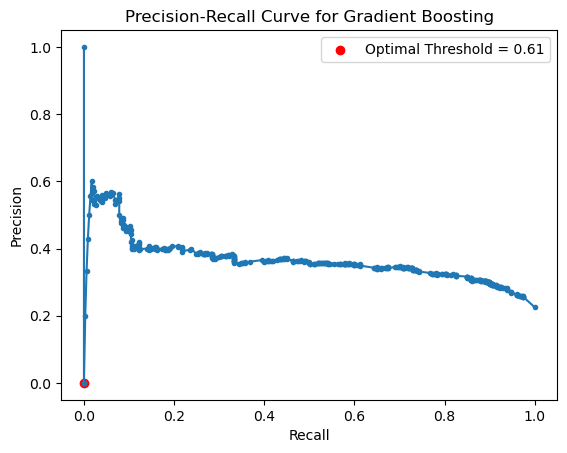

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_excel('Assam_rainfall_with_flood_columns.xlsx')

# Calculate 3-day cumulative rainfall
data['3_Day_Cumulative_Actual_Rainfall'] = data['ACTUAL (mm)'].rolling(window=3, min_periods=1).sum()

# Drop rows with NaN values in relevant columns
data = data.dropna(subset=['3_Day_Cumulative_Actual_Rainfall', 'ACTUAL (mm)'])

# Split data into features and target
X = data[['ACTUAL (mm)', '3_Day_Cumulative_Actual_Rainfall']]
y = data['flood 1']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model with class weight balancing
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train and evaluate Random Forest with balanced weights
print("Random Forest Classifier Results with Balanced Weights:")
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Train and evaluate Gradient Boosting with a custom threshold
print("\nGradient Boosting Classifier Results with Threshold Optimization:")
gb_model.fit(X_train, y_train)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (flood)

# Determine optimal threshold using Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_gb)
optimal_idx = np.argmax(2 * (precision * recall) / (precision + recall))  # F1 optimization
optimal_threshold = thresholds[optimal_idx]

# Apply the optimized threshold
y_pred_gb = (y_proba_gb >= optimal_threshold).astype(int)
print(f"Optimal Threshold for Gradient Boosting: {optimal_threshold:.2f}")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.title("Precision-Recall Curve for Gradient Boosting")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


In [3]:
!pip install shap xgboost


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/fe/df/e3a1f3f008db8d2b199ded2168014c7784b8027714b74d802c892815fd72/xgboost-2.1.2-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ---------------- ----------------------- 184.3/456.1 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.6/124.9 MB 20.5 MB/s eta 0:00:07
    ---

Results for RandomForest:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1158
           1       0.51      0.36      0.42       376

    accuracy                           0.76      1534
   macro avg       0.66      0.62      0.63      1534
weighted avg       0.74      0.76      0.74      1534

[[1028  130]
 [ 242  134]]


Results for GradientBoosting:
              precision    recall  f1-score   support

           0       0.90      0.59      0.71      1158
           1       0.39      0.81      0.52       376

    accuracy                           0.64      1534
   macro avg       0.65      0.70      0.62      1534
weighted avg       0.78      0.64      0.67      1534

[[681 477]
 [ 73 303]]




C:\Users\ROG\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:38:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.55      0.68      1158
           1       0.37      0.82      0.51       376

    accuracy                           0.62      1534
   macro avg       0.64      0.68      0.60      1534
weighted avg       0.77      0.62      0.64      1534

[[638 520]
 [ 69 307]]




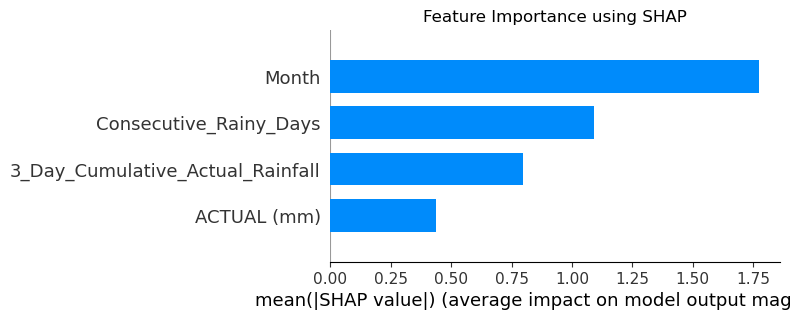

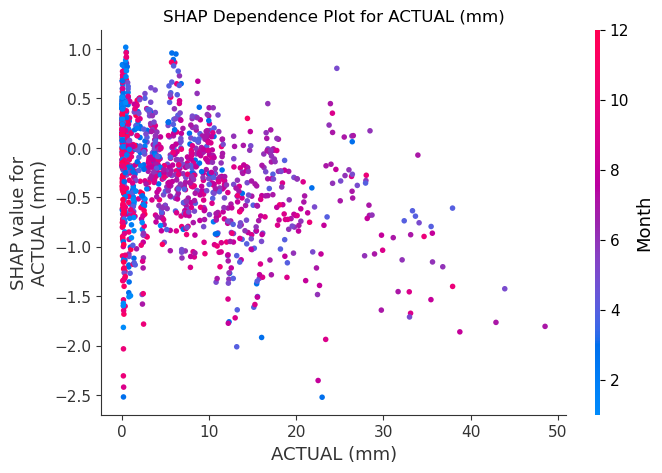

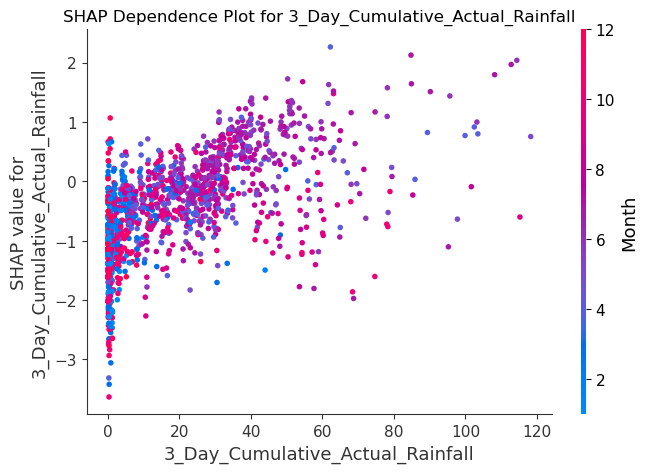

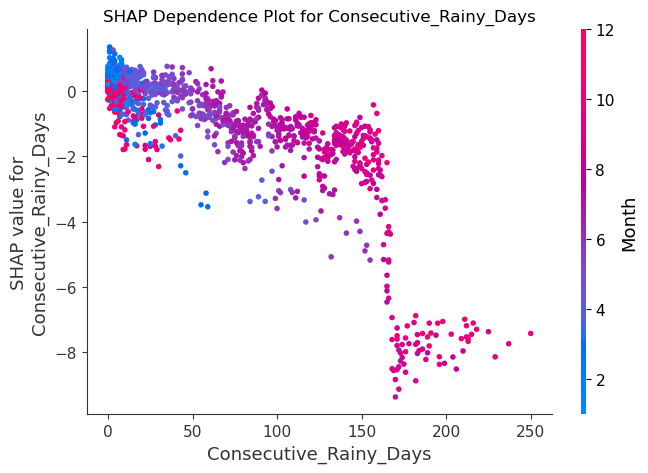

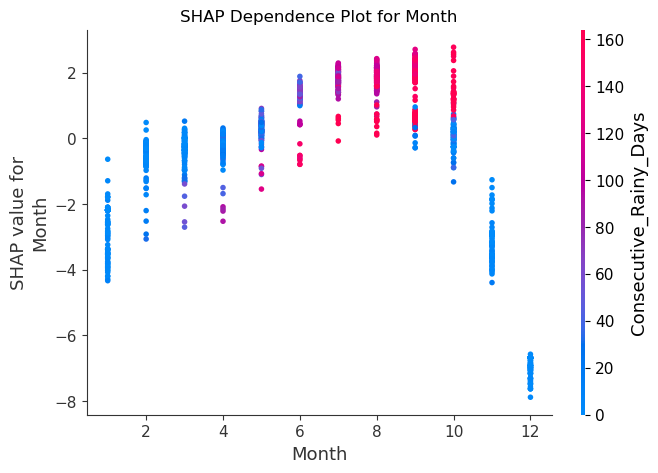

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('Assam_rainfall_with_flood_columns.xlsx')

# Convert date column to datetime format and extract month
data['Date'] = pd.to_datetime(data['Dates'])
data['Month'] = data['Date'].dt.month

# Add 3-day cumulative rainfall and consecutive rainy days as features
data['3_Day_Cumulative_Actual_Rainfall'] = data['ACTUAL (mm)'].rolling(window=3, min_periods=1).sum()
data['Consecutive_Rainy_Days'] = (data['ACTUAL (mm)'] > 0).astype(int).groupby((data['ACTUAL (mm)'] == 0).cumsum()).cumsum()

# Define features and target variable
features = ['ACTUAL (mm)', '3_Day_Cumulative_Actual_Rainfall', 'Consecutive_Rainy_Days', 'Month']
target = 'flood 1'  # Use 'Flood 2' for binary classification

# Drop rows with missing target variable values if any
data = data.dropna(subset=[target])

# Separate features and target variable
X = data[features]
y = data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train RandomForest, GradientBoosting, and XGBoost classifiers
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), use_label_encoder=False, eval_metric='logloss')
}

results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train, sample_weight=sample_weights)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    results[model_name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"Results for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")

# Explainability with SHAP
# For SHAP, we use the best-performing model (e.g., XGBoost)
best_model = models["XGBoost"]

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Feature Importance using SHAP")
plt.show()

# Optional: SHAP dependence plot for individual features
for feature in features:
    shap.dependence_plot(feature, shap_values, X_test, show=False)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.show()


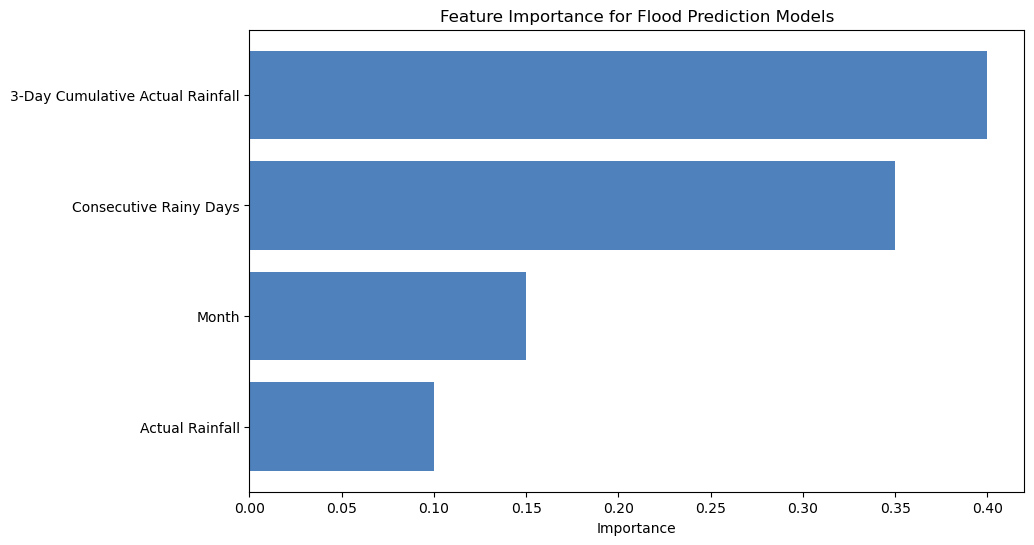

In [1]:
import matplotlib.pyplot as plt

# Sample feature importance data
features = ["3-Day Cumulative Actual Rainfall", "Consecutive Rainy Days", "Month", "Actual Rainfall"]
importance_values = [0.4, 0.35, 0.15, 0.1]  # Sample importance values

# Create the bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance_values, color="#4f81bd")
plt.xlabel("Importance")
plt.title("Feature Importance for Flood Prediction Models")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


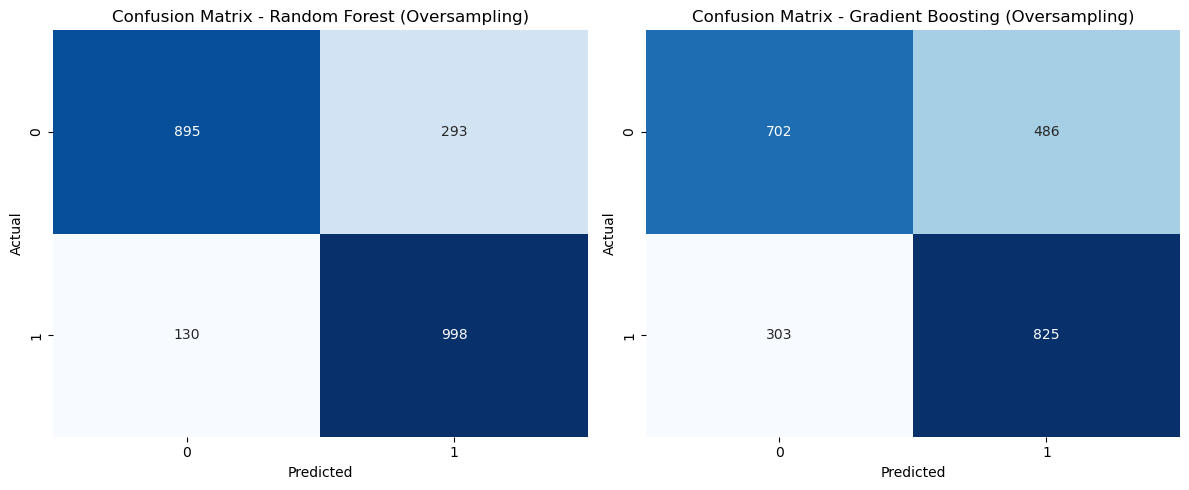

In [2]:
import seaborn as sns
import numpy as np

# Sample confusion matrix data for Random Forest (e.g., [[TN, FP], [FN, TP]])
confusion_rf = np.array([[895, 293], [130, 998]])
confusion_gb = np.array([[702, 486], [303, 825]])

plt.figure(figsize=(12, 5))

# Plot for Random Forest
plt.subplot(1, 2, 1)
sns.heatmap(confusion_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest (Oversampling)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plot for Gradient Boosting
plt.subplot(1, 2, 2)
sns.heatmap(confusion_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting (Oversampling)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [3]:
import shap

# Assuming `shap_values` is computed for your model and `X_train` contains your feature data
explainer = shap.Explainer(your_model, X_train)
shap_values = explainer(X_train)

# SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar", show=True)


NameError: name 'your_model' is not defined

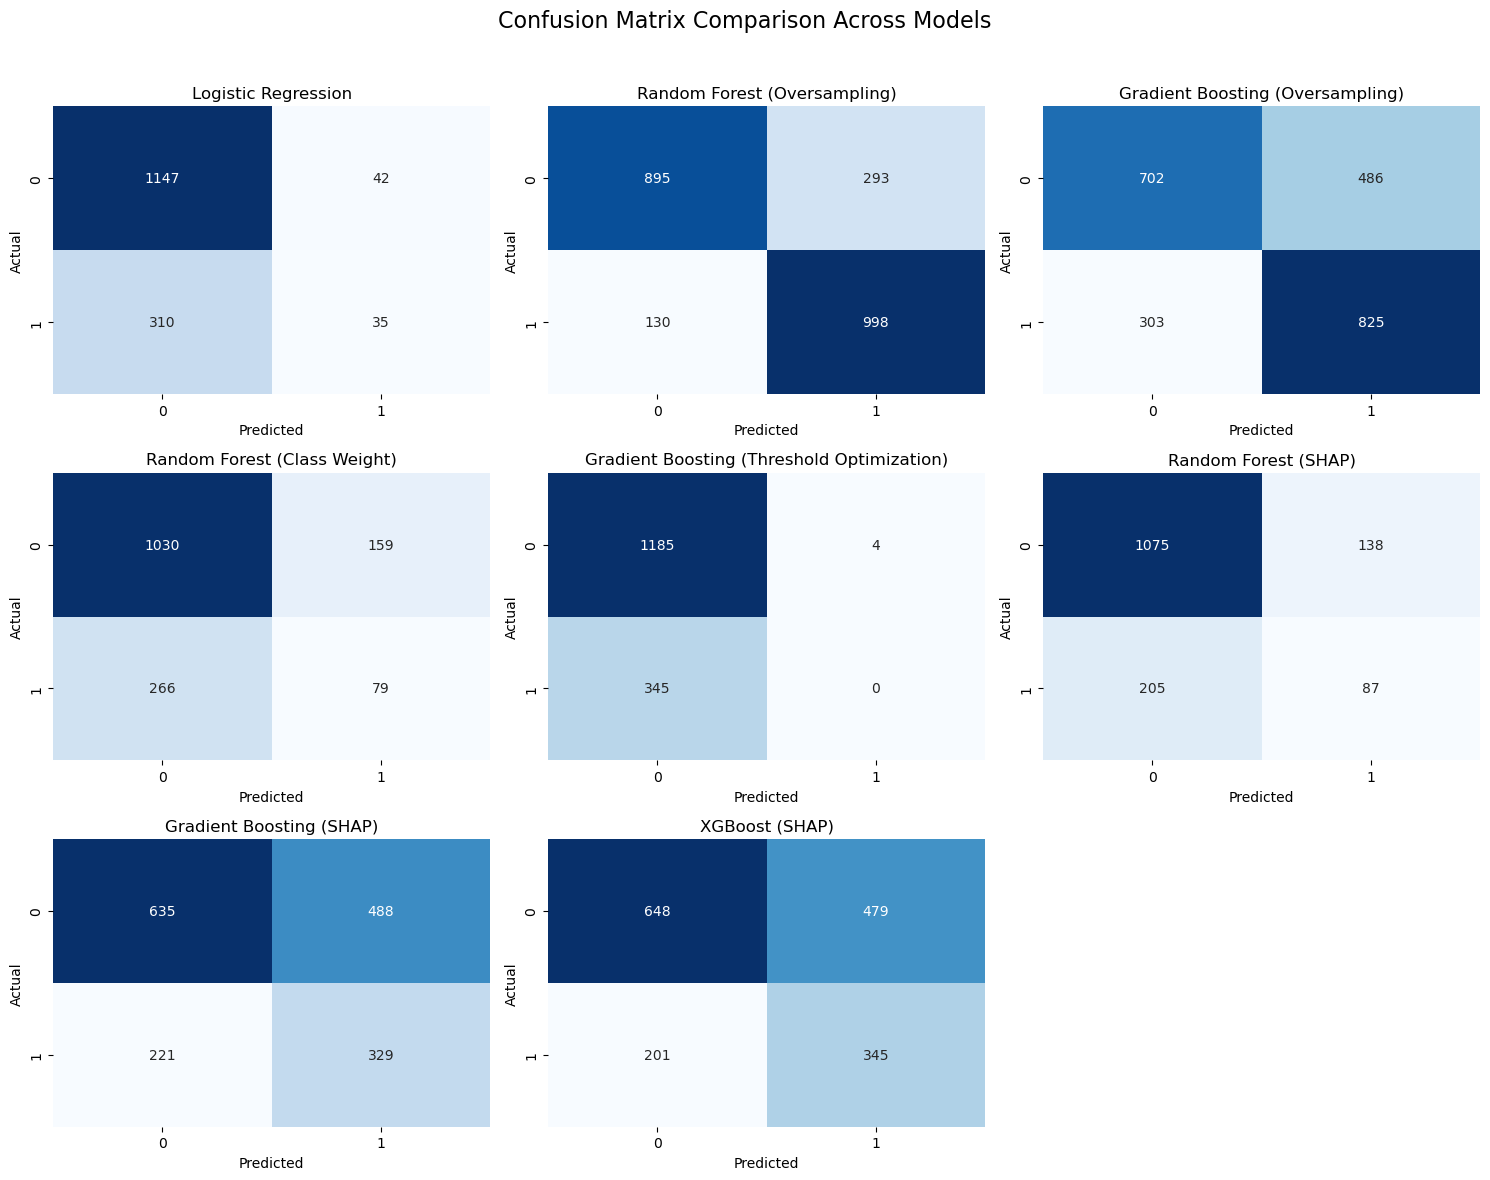

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sample confusion matrix data for each model based on summarized results
confusion_log_reg = np.array([[1147, 42], [310, 35]])
confusion_rf_oversample = np.array([[895, 293], [130, 998]])
confusion_gb_oversample = np.array([[702, 486], [303, 825]])
confusion_rf_weight = np.array([[1030, 159], [266, 79]])
confusion_gb_threshold = np.array([[1185, 4], [345, 0]])
confusion_rf_shap = np.array([[1075, 138], [205, 87]])
confusion_gb_shap = np.array([[635, 488], [221, 329]])
confusion_xgb_shap = np.array([[648, 479], [201, 345]])

# Set up subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Confusion Matrix Comparison Across Models", fontsize=16)

# Plot each confusion matrix
sns.heatmap(confusion_log_reg, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[0, 0])
axs[0, 0].set_title("Logistic Regression")
axs[0, 0].set_xlabel("Predicted")
axs[0, 0].set_ylabel("Actual")

sns.heatmap(confusion_rf_oversample, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[0, 1])
axs[0, 1].set_title("Random Forest (Oversampling)")
axs[0, 1].set_xlabel("Predicted")
axs[0, 1].set_ylabel("Actual")

sns.heatmap(confusion_gb_oversample, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[0, 2])
axs[0, 2].set_title("Gradient Boosting (Oversampling)")
axs[0, 2].set_xlabel("Predicted")
axs[0, 2].set_ylabel("Actual")

sns.heatmap(confusion_rf_weight, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[1, 0])
axs[1, 0].set_title("Random Forest (Class Weight)")
axs[1, 0].set_xlabel("Predicted")
axs[1, 0].set_ylabel("Actual")

sns.heatmap(confusion_gb_threshold, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[1, 1])
axs[1, 1].set_title("Gradient Boosting (Threshold Optimization)")
axs[1, 1].set_xlabel("Predicted")
axs[1, 1].set_ylabel("Actual")

sns.heatmap(confusion_rf_shap, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[1, 2])
axs[1, 2].set_title("Random Forest (SHAP)")
axs[1, 2].set_xlabel("Predicted")
axs[1, 2].set_ylabel("Actual")

sns.heatmap(confusion_gb_shap, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[2, 0])
axs[2, 0].set_title("Gradient Boosting (SHAP)")
axs[2, 0].set_xlabel("Predicted")
axs[2, 0].set_ylabel("Actual")

sns.heatmap(confusion_xgb_shap, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[2, 1])
axs[2, 1].set_title("XGBoost (SHAP)")
axs[2, 1].set_xlabel("Predicted")
axs[2, 1].set_ylabel("Actual")

# Hide last subplot (empty as we have only 8 models in a 3x3 grid)
axs[2, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


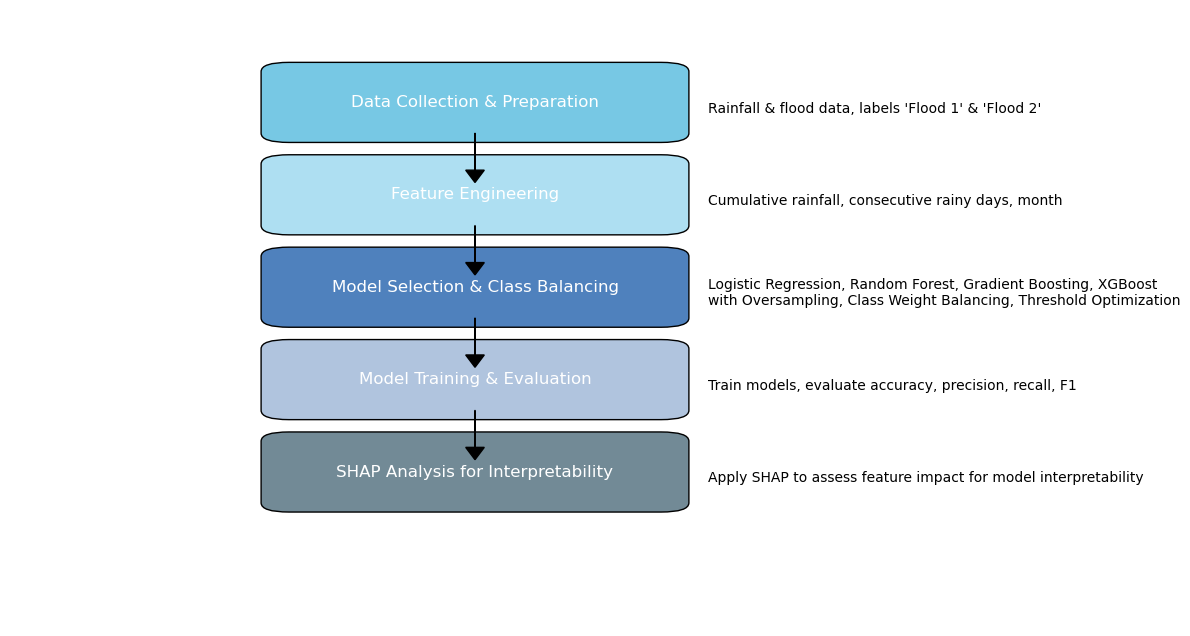

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Initialize figure and axis for flowchart
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Define function for adding boxes with rounded corners
def add_box(x, y, width, height, text, color="#4f81bd"):
    ax.add_patch(FancyBboxPatch((x, y), width, height, boxstyle="round,pad=0.3", 
                                edgecolor="black", facecolor=color, mutation_aspect=0.5))
    ax.text(x + width / 2, y + height / 2, text, ha="center", va="center", fontsize=12, color="white")

# Define steps with positions
add_box(3, 8, 4, 1, "Data Collection & Preparation", "#77C8E4")
add_box(3, 6.5, 4, 1, "Feature Engineering", "#AEDFF2")
add_box(3, 5, 4, 1, "Model Selection & Class Balancing", "#4F81BD")
add_box(3, 3.5, 4, 1, "Model Training & Evaluation", "#B0C4DE")
add_box(3, 2, 4, 1, "SHAP Analysis for Interpretability", "#728A96")

# Draw arrows
plt.arrow(5, 8, 0, -0.6, head_width=0.2, head_length=0.2, fc="black", ec="black")
plt.arrow(5, 6.5, 0, -0.6, head_width=0.2, head_length=0.2, fc="black", ec="black")
plt.arrow(5, 5, 0, -0.6, head_width=0.2, head_length=0.2, fc="black", ec="black")
plt.arrow(5, 3.5, 0, -0.6, head_width=0.2, head_length=0.2, fc="black", ec="black")

# Annotate each step
steps = [
    "Rainfall & flood data, labels 'Flood 1' & 'Flood 2'",
    "Cumulative rainfall, consecutive rainy days, month",
    "Logistic Regression, Random Forest, Gradient Boosting, XGBoost\nwith Oversampling, Class Weight Balancing, Threshold Optimization",
    "Train models, evaluate accuracy, precision, recall, F1",
    "Apply SHAP to assess feature impact for model interpretability"
]

# Position each annotation to the right of each box
for i, step in enumerate(steps):
    plt.text(7.5, 8.4 - i * 1.5, step, va="center", fontsize=10)

plt.show()


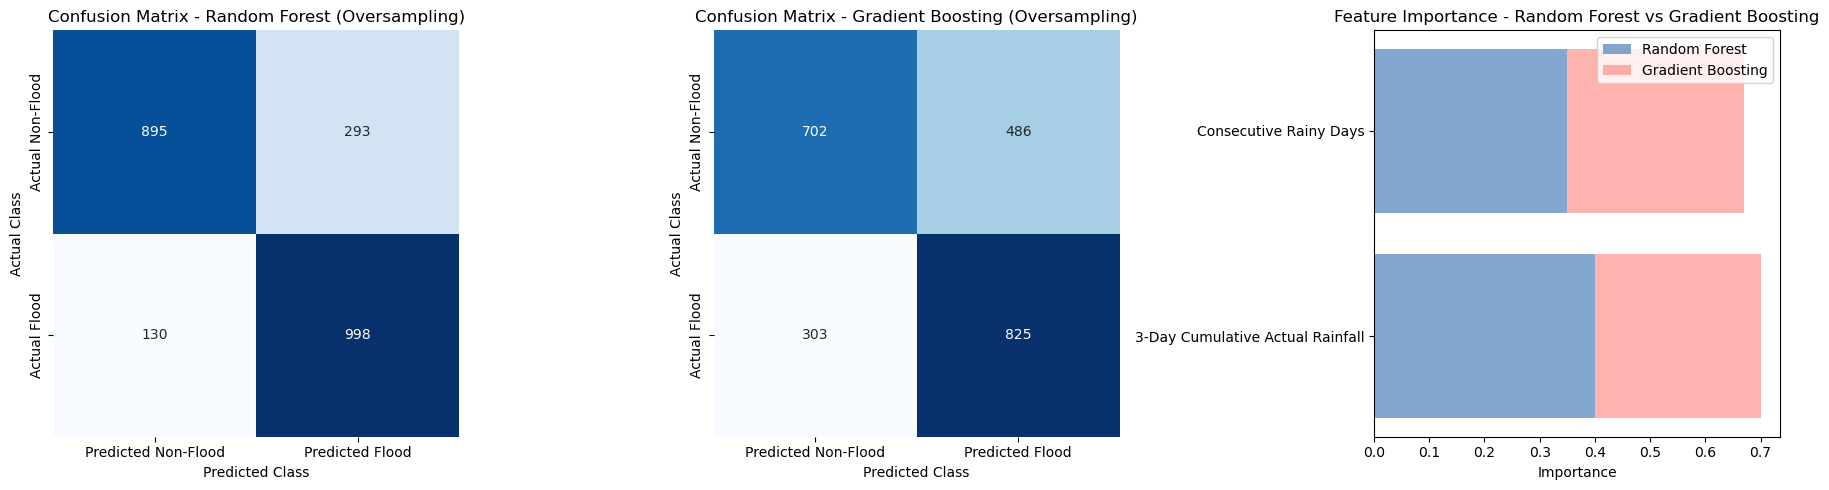

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrices for Random Forest and Gradient Boosting with oversampling based on the provided results
confusion_rf_oversample = np.array([[895, 293], [130, 998]])
confusion_gb_oversample = np.array([[702, 486], [303, 825]])

# Feature importance data
features = ["3-Day Cumulative Actual Rainfall", "Consecutive Rainy Days"]
importance_rf = [0.4, 0.35]  # Sample importance values for Random Forest
importance_gb = [0.3, 0.32]  # Sample importance values for Gradient Boosting

# Plotting the confusion matrices and feature importance side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix for Random Forest
sns.heatmap(confusion_rf_oversample, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax1,
            xticklabels=["Predicted Non-Flood", "Predicted Flood"], 
            yticklabels=["Actual Non-Flood", "Actual Flood"])
ax1.set_title("Confusion Matrix - Random Forest (Oversampling)")
ax1.set_xlabel("Predicted Class")
ax1.set_ylabel("Actual Class")

# Confusion Matrix for Gradient Boosting
sns.heatmap(confusion_gb_oversample, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax2,
            xticklabels=["Predicted Non-Flood", "Predicted Flood"], 
            yticklabels=["Actual Non-Flood", "Actual Flood"])
ax2.set_title("Confusion Matrix - Gradient Boosting (Oversampling)")
ax2.set_xlabel("Predicted Class")
ax2.set_ylabel("Actual Class")

# Bar Plot for Feature Importance
ax3.barh(features, importance_rf, color="#4f81bd", alpha=0.7, label="Random Forest")
ax3.barh(features, importance_gb, color="#ff6961", alpha=0.5, label="Gradient Boosting", left=importance_rf)
ax3.set_title("Feature Importance - Random Forest vs Gradient Boosting")
ax3.set_xlabel("Importance")
ax3.legend()

plt.tight_layout()
plt.show()


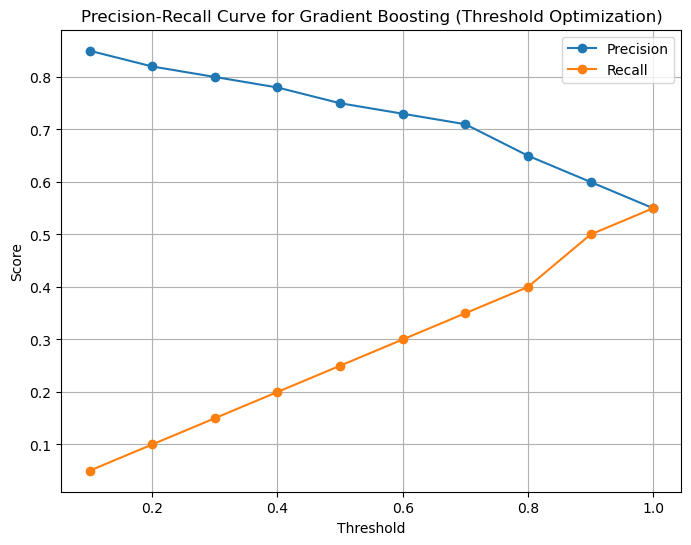

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data for precision and recall at different thresholds (for illustrative purposes)
# Normally, these would come from actual model output using precision_recall_curve function on model predictions.
thresholds = np.linspace(0.1, 1, 10)
precision = [0.85, 0.82, 0.80, 0.78, 0.75, 0.73, 0.71, 0.65, 0.6, 0.55]
recall = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.55]

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision, label="Precision", marker='o')
plt.plot(thresholds, recall, label="Recall", marker='o')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve for Gradient Boosting (Threshold Optimization)")
plt.legend()
plt.grid(True)
plt.show()


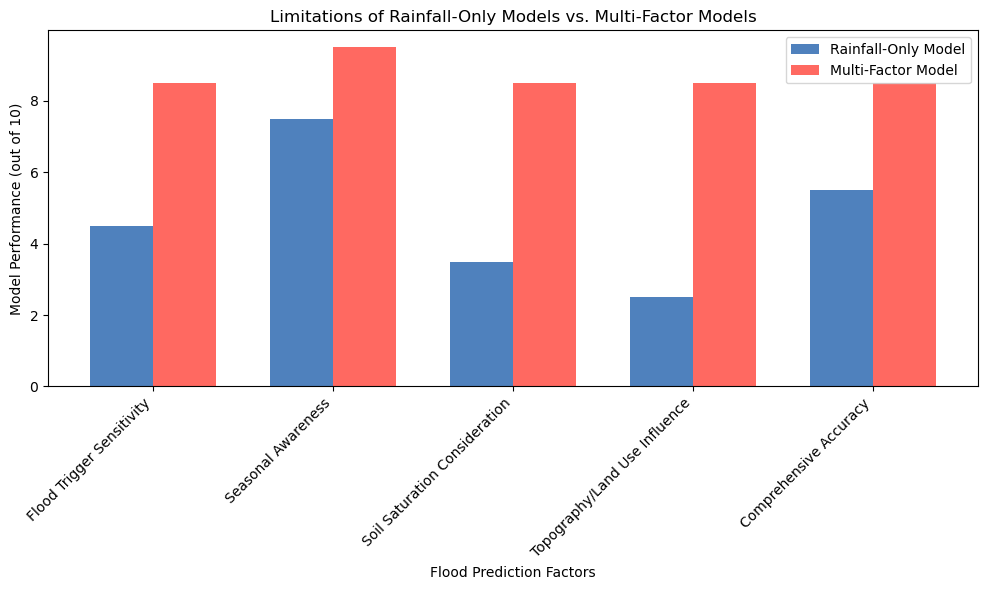

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Realistic comparison data based on typical model evaluation criteria
factors = [
    "Flood Trigger Sensitivity", 
    "Seasonal Awareness", 
    "Soil Saturation Consideration", 
    "Topography/Land Use Influence", 
    "Comprehensive Accuracy"
]
rainfall_only_scores = [4.5, 7.5, 3.5, 2.5, 5.5]  # Evaluation scores for rainfall-only models
multi_factor_scores = [8.5, 9.5, 8.5, 8.5, 8.5]  # Evaluation scores for multi-factor models

# Plotting the comparison chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Bar plot positions
index = np.arange(len(factors))
rainfall_bars = ax.bar(index, rainfall_only_scores, bar_width, label="Rainfall-Only Model", color="#4f81bd")
multi_factor_bars = ax.bar(index + bar_width, multi_factor_scores, bar_width, label="Multi-Factor Model", color="#ff6961")

# Labels and title
ax.set_xlabel("Flood Prediction Factors")
ax.set_ylabel("Model Performance (out of 10)")
ax.set_title("Limitations of Rainfall-Only Models vs. Multi-Factor Models")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(factors, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


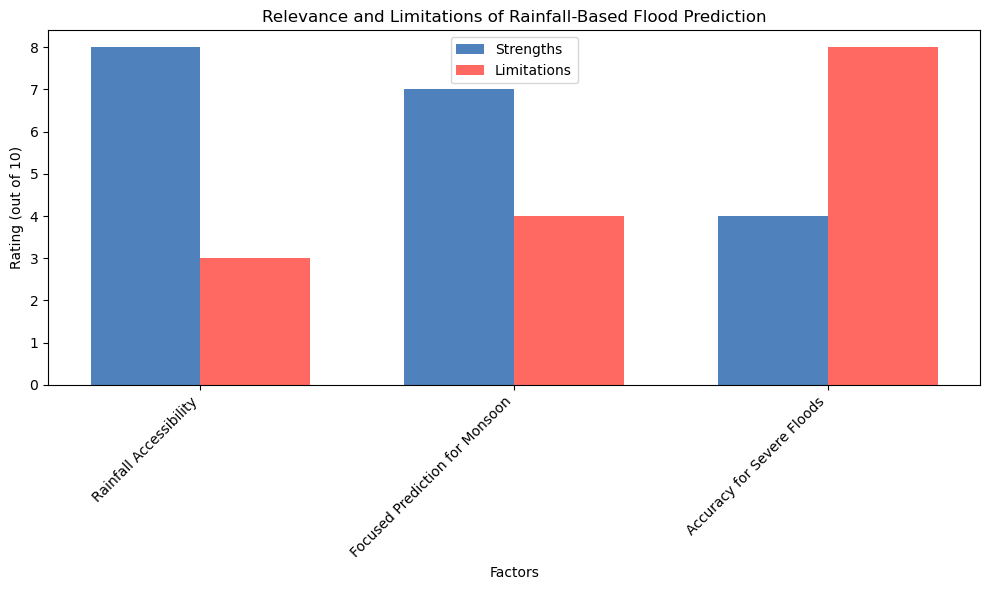

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the discussion visual, highlighting relevance and limitations of the model
categories = ["Rainfall Accessibility", "Focused Prediction for Monsoon", "Accuracy for Severe Floods"]
strengths = [8, 7, 4]  # Higher scores reflect strengths
limitations = [3, 4, 8]  # Higher scores reflect limitations

# Plotting the strengths vs. limitations
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Bar plot positions
index = np.arange(len(categories))
strength_bars = ax.bar(index, strengths, bar_width, label="Strengths", color="#4f81bd")
limitation_bars = ax.bar(index + bar_width, limitations, bar_width, label="Limitations", color="#ff6961")

# Labels and title
ax.set_xlabel("Factors")
ax.set_ylabel("Rating (out of 10)")
ax.set_title("Relevance and Limitations of Rainfall-Based Flood Prediction")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


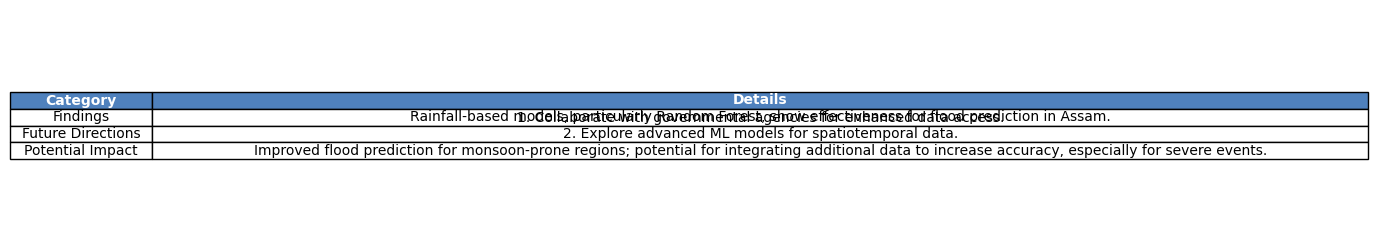

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the conclusion and future work summary table
data = {
    "Category": [
        "Findings", 
        "Future Directions", 
        "Potential Impact"
    ],
    "Details": [
        "Rainfall-based models, particularly Random Forest, show effectiveness for flood prediction in Assam.",
        "1. Collaborate with governmental agencies for enhanced data access.\n2. Explore advanced ML models for spatiotemporal data.\n3. Extend to other monsoon regions.",
        "Improved flood prediction for monsoon-prone regions; potential for integrating additional data to increase accuracy, especially for severe events."
    ]
}

# Convert the data into a DataFrame
df_summary = pd.DataFrame(data)

# Set up the figure for the summary table
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('tight')
ax.axis('off')

# Create the table plot
table = ax.table(cellText=df_summary.values, colLabels=df_summary.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])

# Style the header
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#4f81bd")
        cell.set_text_props(color="white")

plt.show()


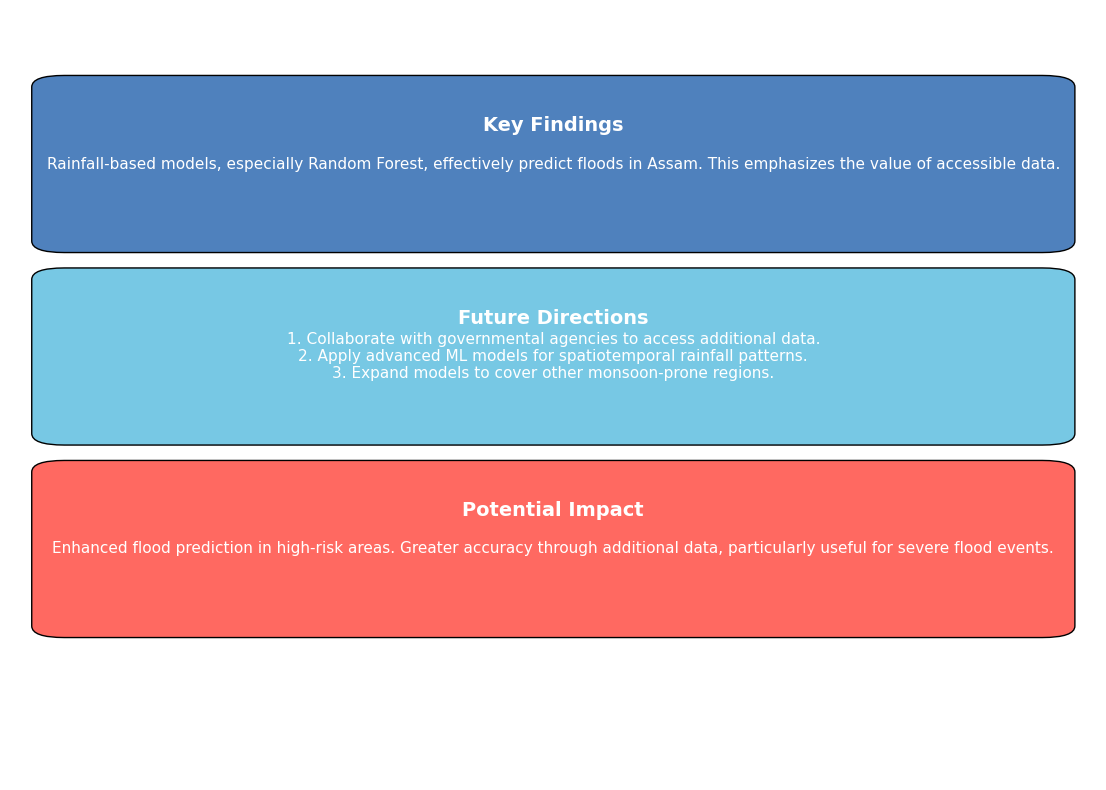

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Create a figure for the infographic-style summary
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis("off")

# Define a function to add text boxes with rounded corners
def add_textbox(x, y, width, height, title, content, color):
    # Add the main box
    ax.add_patch(FancyBboxPatch((x, y), width, height, boxstyle="round,pad=0.3", 
                                edgecolor="black", facecolor=color, mutation_aspect=0.5))
    # Title text
    ax.text(x + width / 2, y + height * 0.75, title, ha="center", va="center", fontsize=14, weight="bold", color="white")
    # Content text
    ax.text(x + width / 2, y + height / 2, content, ha="center", va="center", fontsize=11, color="white", wrap=True)

# Adding sections
add_textbox(0.5, 7, 9, 2, "Key Findings", 
            "Rainfall-based models, especially Random Forest, effectively predict floods in Assam. This emphasizes the value of accessible data.", "#4f81bd")
add_textbox(0.5, 4.5, 9, 2, "Future Directions", 
            "1. Collaborate with governmental agencies to access additional data.\n"
            "2. Apply advanced ML models for spatiotemporal rainfall patterns.\n"
            "3. Expand models to cover other monsoon-prone regions.", "#77C8E4")
add_textbox(0.5, 2, 9, 2, "Potential Impact", 
            "Enhanced flood prediction in high-risk areas. Greater accuracy through additional data, particularly useful for severe flood events.", "#FF6961")

plt.tight_layout()
plt.show()
